<a href="https://colab.research.google.com/github/ETropynina/Diamonds/blob/main/Diamonds_task_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия. Работа с признаками

## Описание задачи и загрузка данных

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Посмотрим на типы столбцов.

In [3]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [7]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

### Задание 1

Есть ли в наборе данных пропущенные значения? Если да, удалите их.

Также выведите на экран число пропусков в каждом столбце.

In [9]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Задача 2

Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)?  
Если да, то удалите их.

In [10]:
data = data.drop(columns=['Unnamed: 0'])

In [11]:
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

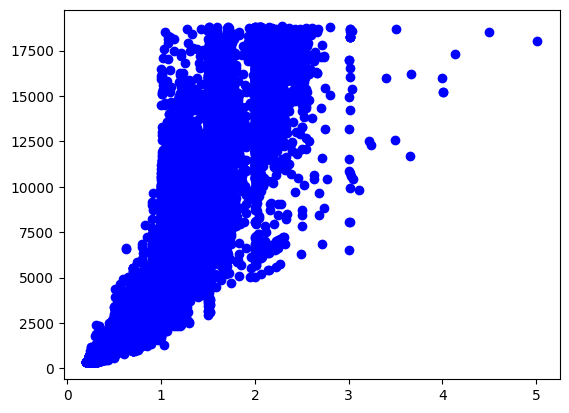

In [23]:
plt.scatter(x='carat',y='price',data = data, color = 'blue')

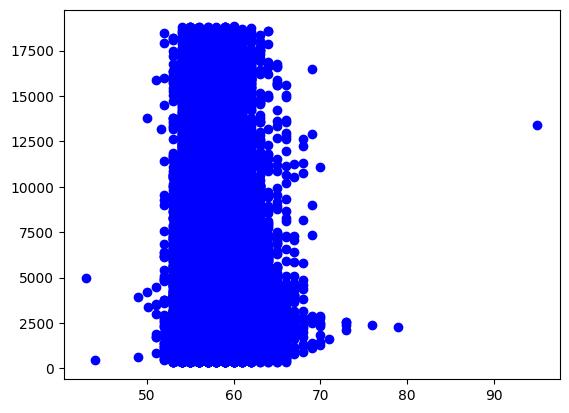

In [22]:
plt.scatter(x='table',y='price',data = data, color = 'blue')

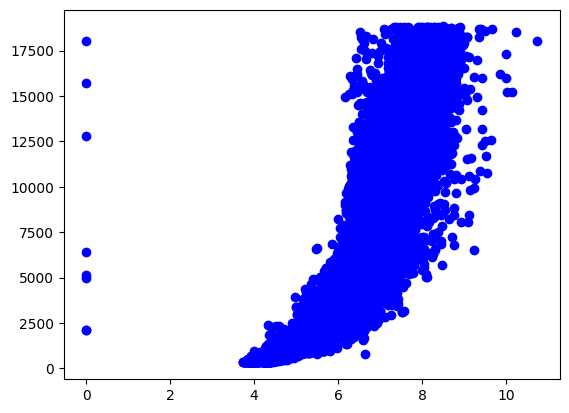

In [18]:
plt.scatter(x='x',y='price',data = data, color = 'blue')

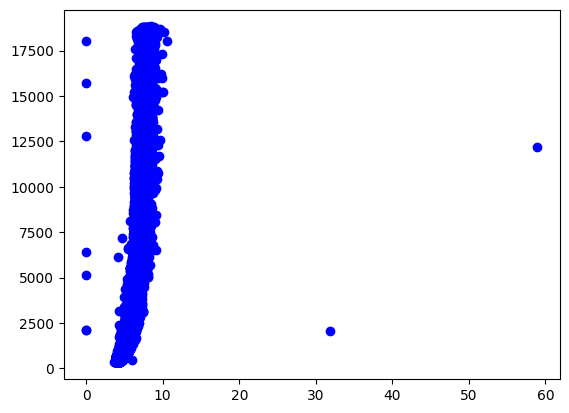

In [19]:
plt.scatter(x='y',y='price',data = data, color = 'blue')

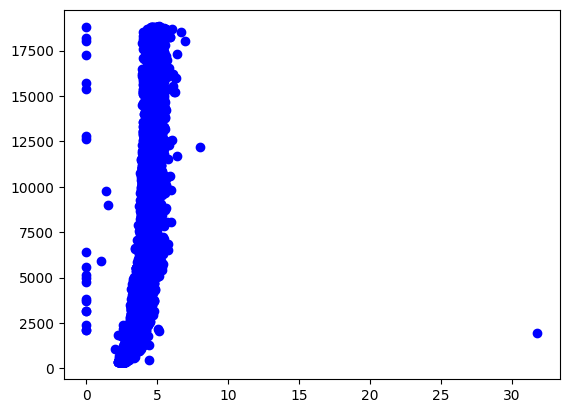

In [20]:
plt.scatter(x='z',y='price',data = data, color = 'blue')

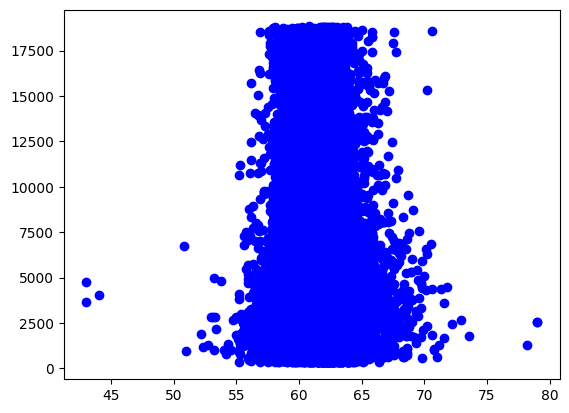

In [17]:
plt.scatter(x='depth',y='price',data = data, color = 'blue')

### Задание 3

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками.  
Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какой вещественный признак коррелирует с целевой переменной больше всего?

<Axes: >

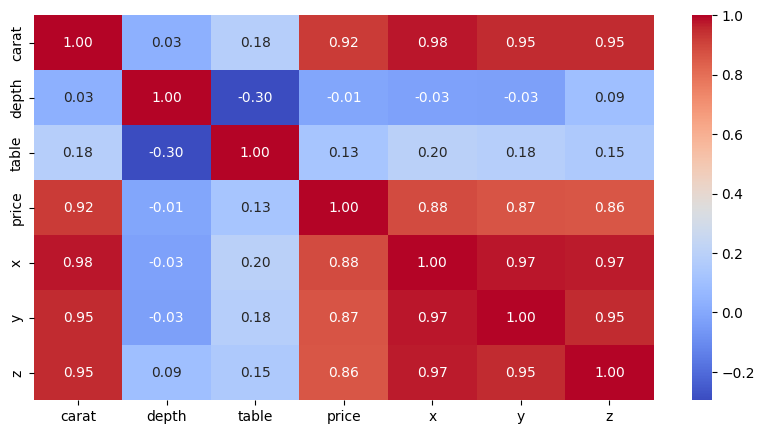

In [21]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

### Задание 4

Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования ([`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Не забудьте поставить значение параметра `drop_first` равным `True`.

Сколько получилось столбцов в таблице `data`?

*P.S. Числовые столбцы оставляем в таблице без изменений.*

In [24]:
data = pd.get_dummies(data, drop_first=True)

In [25]:
data.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [26]:
data.shape

(53940, 24)

### Задание 5

Создайте матрицу `X`, содержащую все признаки, и не содержащую целевую переменную `price`. Также создайте вектор `y`, содержащий целевую переменную `price`.

In [27]:
X = data.drop(columns=['price'])
y = data['price']

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной `0.3`.

При разбиении укажите `random_state = 42`.

In [29]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

### Задание 6

Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

*  Обучите (`fit`) scaler на тренировочных данных
*  Преобразуйте (`transform`) и трейн, и тест

После применения масштабирования матрица перестает быть объектом `pandas.DataFrame` - решите эту проблему.

In [56]:
from sklearn.preprocessing import StandardScaler

model = StandardScaler()
model.fit(Xtrain, ytrain)

StandardScaler()

In [57]:
transform = model.transform(Xtrain)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Xtest, ytest, color='blue')
plt.plot(Xtest, predictions, color='red', linewidth=2)
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")
plt.title("Linear Regression: Регрессионная линия")
plt.show()

### Задание 7

Обучите линейную регрессию на тренировочной выборке. Выведите *r2-score* на тренировочной и тестовой выборках.

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lmodel = LinearRegression()
lmodel.fit(Xtrain, ytrain)
lmodel_pred = lmodel.predict(Xtest)

In [59]:
round(r2_score(ytest, lmodel_pred),2)

0.92

### Задание 8

Выведите на экран веса, которые линейная регрессия присвоила признакам.

Какой признак имеет наибольший отрицательный вес? (наибольший по модулю среди всех отрицательных весов)

In [61]:
lmodel.coef_

array([ 1.12262051e+04, -6.31199113e+01, -2.70960563e+01, -9.80549238e+02,
       -5.63315299e+00, -4.81547644e+01,  5.95521080e+02,  8.46196258e+02,
        7.77769963e+02,  7.43301360e+02, -2.17028968e+02, -2.73303976e+02,
       -5.00160238e+02, -9.98634669e+02, -1.47608423e+03, -2.38198979e+03,
        5.45903730e+03,  3.75170967e+03,  2.78194055e+03,  4.65783431e+03,
        4.33672558e+03,  5.10133518e+03,  5.02829553e+03])

In [60]:
features = Xtrain.columns
weights = lmodel.coef_
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights

,Feature,Weight
0,carat,11226.205118
1,depth,-63.119911
2,table,-27.096056
3,x,-980.549238
4,y,-5.633153
5,z,-48.154764
6,cut_Good,595.521080
7,cut_Ideal,846.196258
8,cut_Premium,777.769963
9,cut_Very Good,743.301360


## Попытка улучшить качество модели

Данная часть является творческой, и задания в ней немного сложнее, чем предыдущие.

Следующие вопросы не проверяются тестами.

### Задание 9

Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц `Xtrain` и `Xtest` признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?

Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

In [ ]:
# your code here

### Задание 10

Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель.  

Помогло ли это улучшить качество модели?

In [ ]:
# your code here